#   LOGISTIC REGRESSION : CUSTOMER CHURN PREDICTION MODEL

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [216]:
df = pd.read_csv("C:/Users/sachin/OneDrive/Desktop/datasets/churn_prediction.csv")

In [217]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [218]:
df.dropna(inplace = True)

In [219]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [220]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [221]:
a =pd.get_dummies(df.gender)

In [222]:
data = df.join(a)

In [223]:
data = data.drop(["gender"],axis =1 )

In [224]:
data

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Female,Male
0,1,3135,66,0.0,self_employed,187.0,2,755,224.0,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1
4,6,2531,42,2.0,self_employed,1494.0,3,388,58.0,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1
5,7,263,42,0.0,self_employed,1096.0,2,1666,60.0,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,1,0
6,8,5922,72,0.0,retired,1020.0,1,1,98.0,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,0,1
7,9,1145,46,0.0,self_employed,623.0,2,317,172.0,10096.58,...,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2041,42,0.0,self_employed,146.0,2,286,57.0,7493.69,...,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0,0,1
28377,30297,1845,10,0.0,student,1020.0,2,1207,70.0,1076.43,...,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,1,0
28378,30298,4919,34,0.0,self_employed,1046.0,2,223,14.0,3844.10,...,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,1,0
28379,30299,297,47,0.0,salaried,1096.0,2,588,0.0,65511.97,...,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,0,1


In [225]:
data["occupation"].value_counts()

self_employed    13434
salaried          5602
retired           1638
student           1369
company             24
Name: occupation, dtype: int64

In [226]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['occupation'] = encoder.fit_transform(data['occupation'])

In [227]:
data

,customer_id,vintage,age,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,Female,Male
0,1,3135,66,0.0,3,187.0,2,755,224.0,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1
4,6,2531,42,2.0,3,1494.0,3,388,58.0,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1
5,7,263,42,0.0,3,1096.0,2,1666,60.0,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,1,0
6,8,5922,72,0.0,1,1020.0,1,1,98.0,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,0,1
7,9,1145,46,0.0,3,623.0,2,317,172.0,10096.58,...,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2041,42,0.0,3,146.0,2,286,57.0,7493.69,...,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0,0,1
28377,30297,1845,10,0.0,4,1020.0,2,1207,70.0,1076.43,...,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,1,0
28378,30298,4919,34,0.0,3,1046.0,2,223,14.0,3844.10,...,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,1,0
28379,30299,297,47,0.0,2,1096.0,2,588,0.0,65511.97,...,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,0,1


In [228]:
data = data.drop(['customer_id'],axis = 1)

In [229]:
data = data.drop(['city'],axis = 1)

<Axes: >

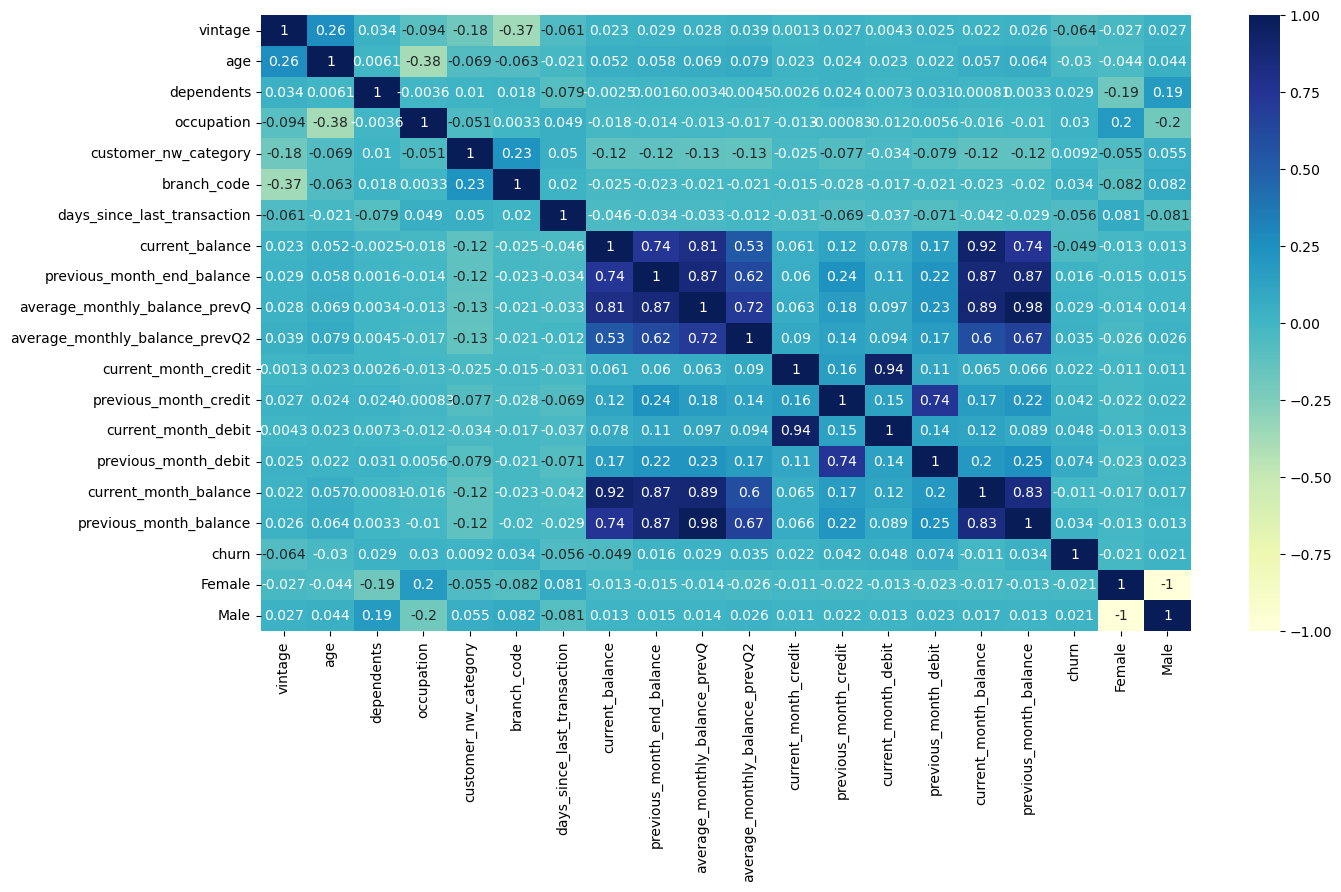

In [230]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),annot = True, cmap = "YlGnBu")

array([[<Axes: title={'center': 'vintage'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dependents'}>,
        <Axes: title={'center': 'occupation'}>],
       [<Axes: title={'center': 'customer_nw_category'}>,
        <Axes: title={'center': 'branch_code'}>,
        <Axes: title={'center': 'days_since_last_transaction'}>,
        <Axes: title={'center': 'current_balance'}>],
       [<Axes: title={'center': 'previous_month_end_balance'}>,
        <Axes: title={'center': 'average_monthly_balance_prevQ'}>,
        <Axes: title={'center': 'average_monthly_balance_prevQ2'}>,
        <Axes: title={'center': 'current_month_credit'}>],
       [<Axes: title={'center': 'previous_month_credit'}>,
        <Axes: title={'center': 'current_month_debit'}>,
        <Axes: title={'center': 'previous_month_debit'}>,
        <Axes: title={'center': 'current_month_balance'}>],
       [<Axes: title={'center': 'previous_month_balance'}>,
        <Axes: title={'center': 'churn'

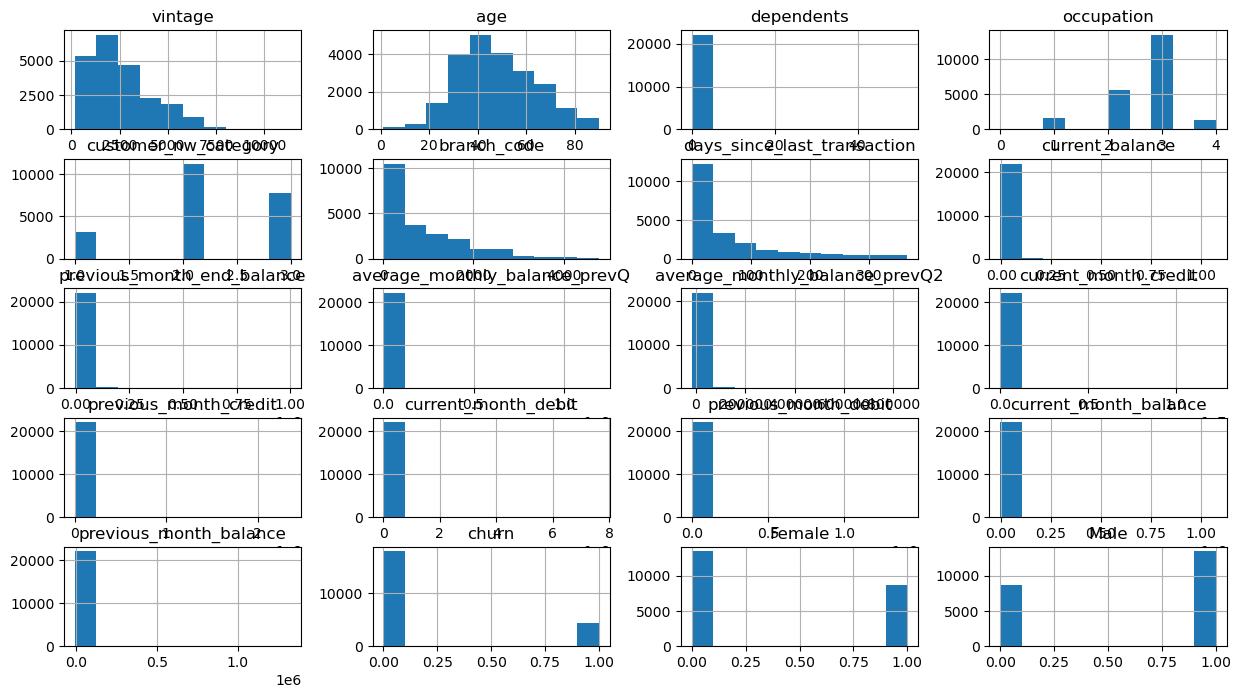

In [231]:

data.hist(figsize = (15,8))

In [232]:
x = data.drop(['churn'],axis = 1)
y = data['churn']

In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [235]:
# training testing split
from sklearn.model_selection import train_test_split 

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [236]:
# model implementation

model = LogisticRegression()

model.fit(x_train,y_train)


LogisticRegression()

In [237]:
model.score(x_train,y_train)

0.8169149719594403

In [238]:
model.score(x_test,y_test)

0.8124150430448572

In [239]:
y_pred = model.predict(x_test)

In [240]:
y_pred.shape

(4414,)

In [241]:
y_test.shape

(4414,)

In [242]:
score =accuracy_score(y_test,y_pred)

In [243]:
score

0.8124150430448572